In [120]:
def extract_cascades_info(vi,tiledir,tiles,nights,petals):
  dataname = tiledir+'/'+tiles[0] + '/deep/zbest-'+str(petals[0])+'-'+str(tiles[0])+'-deep.fits'
  tf = Table.read(dataname,hdu='FIBERMAP')
  tspec = Table.read(dataname,hdu='ZBEST')
  for i in range(1,len(petals)):
      tfn = Table.read(tiledir+'/'+tiles[0] + '/deep/zbest-'+str(petals[i])+'-'+str(tiles[0])+'-deep.fits',hdu='FIBERMAP')
      tf = vstack([tf,tfn])
      tspecn = Table.read(tiledir+'/'+tiles[0] + '/deep/zbest-'+str(petals[i])+'-'+str(tiles[0])+'-deep.fits',hdu='ZBEST')
      tspec = vstack([tspec,tspecn])
            
  EXPID = list(set(tf['EXPID']))[-1] 
  '''This was 0 before but  '''
  tf = tf[tf['EXPID']==EXPID]
  #tf_df = tf['TARGETID','TARGET_RA','TARGET_DEC','FIBER','FLUX_G','FLUX_R','FLUX_Z','FIBERFLUX_G','FIBERFLUX_R','FIBERFLUX_Z','EBV'].to_pandas()
  tf_df = tf.to_pandas()
  tspec_df = tspec['TARGETID','DELTACHI2','Z','ZWARN','ZERR','CHI2','NPIXELS'].to_pandas()
  #for i_coeff in range(0,10):
  #  tspec_df['COEFF_'+str(i_coeff)]=tspec['COEFF'].T[i_coeff]
  #vi = vi.merge(tf_df, how='left', on='TARGETID',suffixes=('', '_y'))
  vi = vi.merge(tspec_df, how='left', on='TARGETID',suffixes=('', '_cas'))
  print(len(vi.columns))
  #vi.drop(vi.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)  
  print(len(vi.columns))
  return vi

In [121]:
import pandas as pd
import os, sys, glob
import fnmatch
import matplotlib.pyplot as plt
import re
from astropy.table import Table, join, vstack
import astropy.io.fits as pf
import pandas as pd

In [122]:
on_nersc=True
VI_dir = os.environ['HOME']+'/projects/VI_files/SV1/ELG/output/'
tiledir   = '/global/cfs/cdirs/desi/spectro/redux/cascades/tiles/'
tiles = ['80608']
nights = ['20201223']
petals = ['0','1','2','3','4', '5', '6' ,'7', '8', '9']
file_name = 'desi-vi_ELG_tile80608_nightdeep_merged_all_210208'
vi_old = pd.read_csv(VI_dir+file_name+'.csv', delimiter = ",", engine='python', keep_default_na=False)
vi_old['TILEID']=tiles[0]
if on_nersc:
  vi = extract_cascades_info(vi_old,tiledir,tiles,nights,petals)

30
30


In [123]:
vi.columns

Index(['TARGETID', 'Redrock_z', 'best_z', 'best_quality', 'Redrock_spectype',
       'best_spectype', 'all_VI_issues', 'all_VI_comments', 'merger_comment',
       'N_VI', 'DELTACHI2', 'ZWARN', 'ZERR', 'TARGET_RA', 'TARGET_DEC',
       'FIBER', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'FIBERFLUX_G', 'FIBERFLUX_R',
       'FIBERFLUX_Z', 'EBV', 'TILEID', 'DELTACHI2_cas', 'Z', 'ZWARN_cas',
       'ZERR_cas', 'CHI2', 'NPIXELS'],
      dtype='object')

(0.0, 100000.0)

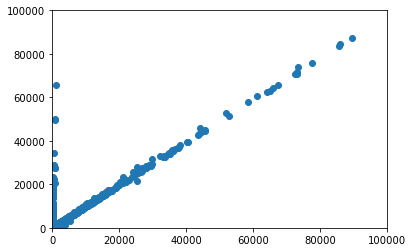

In [94]:
plt.scatter(vi['DELTACHI2'],vi['DELTACHI2_cas'])
plt.xlim(0,100000)
plt.ylim(0,100000)

In [101]:
vi['df']=vi['DELTACHI2']-vi['DELTACHI2_cas']
vi['dz']=abs(vi['Redrock_z']-vi['best_z'])/(1.+vi['best_z'])
vi['dz_cas']=abs(vi['Z']-vi['best_z'])/(1.+vi['best_z'])

In [119]:
vi.loc[(vi['ZWARN']==4) & (vi['best_quality']>=2.5)]#[['best_quality','ZWARN','ZWARN_cas','DELTACHI2','DELTACHI2_cas','best_z','Redrock_z','Z']]

,TARGETID,Redrock_z,best_z,best_quality,Redrock_spectype,best_spectype,all_VI_issues,all_VI_comments,merger_comment,N_VI,...,TILEID,DELTACHI2_cas,Z,ZWARN_cas,ZERR_cas,CHI2,NPIXELS,df,dz,dz_cas
201,39633321159821192,0.9335,0.9335,4.0,GALAXY,GALAXY,,,none,4,...,80608,1839.117887,0.933500,0,0.000010,25699.347383,7929,-1830.572256,0.00000,1.328245e-07
204,39633321159822053,1.3307,1.3307,3.0,GALAXY,GALAXY,,[OII] doublet on weak sky lines weak resolved ...,none,4,...,80608,83.758558,1.330659,0,0.000062,26402.115647,7929,-79.929211,0.00000,1.744304e-05
207,39633321159822951,0.9551,0.9551,4.0,GALAXY,GALAXY,,,none,4,...,80608,3312.939289,0.955140,0,0.000010,25421.226496,7930,-3312.522039,0.00000,2.038378e-05
208,39633321159823057,0.9259,0.9259,4.0,GALAXY,GALAXY,,,none,4,...,80608,1312.849273,0.925877,0,0.000016,27918.525617,7930,-1309.556557,0.00000,1.192348e-05
213,39633321159823472,0.8261,0.8261,3.0,GALAXY,GALAXY,,Weak [OIII] [OII] but robust unconvincing doub...,The lines should be robust,4,...,80608,53.743400,0.826085,0,0.000017,26462.679186,7929,-50.382929,0.00000,8.478290e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3358,39633324628509859,1.1480,1.1483,3.5,GALAXY,GALAXY,R,Broad [OII] broad doublet + plausible Balmer b...,none,4,...,80608,1374.375875,1.148002,0,0.000029,25229.922389,7929,-1373.466993,0.00014,1.385652e-04
3359,39633324628509915,1.0413,1.0413,4.0,GALAXY,GALAXY,S,Bad calibration around 6500 resolved doublet (...,none,4,...,80608,1963.213825,1.041308,0,0.000017,25941.431377,7929,-1958.720486,0.00000,4.043770e-06
3361,39633324628510059,1.4102,1.4102,4.0,GALAXY,GALAXY,,strong resolved doublet + non major NeIII HeI ...,none,4,...,80608,2221.491308,1.410208,0,0.000014,24708.394701,7929,-2212.836755,0.00000,3.451100e-06
3368,39633324628511354,1.0495,1.0495,3.5,GALAXY,GALAXY,,Broad [OII] weak broad doublet + Balmer break ...,none,4,...,80608,396.715795,1.049529,0,0.000062,24935.217110,7929,-393.939336,0.00000,1.435333e-05


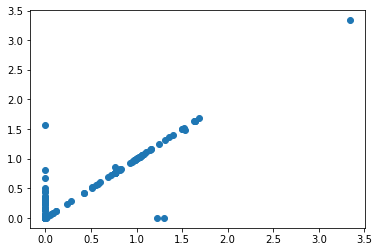

In [83]:
plt.scatter(vi['dz'],vi['dz_cas'])

In [85]:
vi.loc[(vi['best_quality']>=2.5) & (vi['dz_cas']<0.0033) & (vi['dz']>0.0033)]

,TARGETID,Redrock_z,best_z,best_quality,Redrock_spectype,best_spectype,all_VI_issues,all_VI_comments,merger_comment,N_VI,...,TILEID,DELTACHI2_cas,Z,ZWARN_cas,ZERR_cas,CHI2,NPIXELS,df,dz,dz_cas
1418,39633321184987600,1.5335,0.1034,4.0,GALAXY,GALAXY,RS,Interesting pipeline redshift failure,pipeline redshift failure,2,...,80613,87.367309,0.103423,0,0.000013,11322.238477,7929,-78.192067,1.296085,0.000021
2156,39633341678355569,1.5130,0.1288,3.0,GALAXY,GALAXY,R,,None,2,...,80613,85.131343,0.128821,0,0.000016,9310.740965,7929,-80.029387,1.226258,0.000019


In [125]:
import astropy.io.fits as pf
tmp_data = pf.open('/global/cfs/cdirs/desi/spectro/redux/cascades/tiles/80605/deep/zbest-0-80605-deep.fits')

In [132]:
tmp_data[2].data.names

['TARGETID',
 'PETAL_LOC',
 'DEVICE_LOC',
 'LOCATION',
 'FIBER',
 'FIBERSTATUS',
 'TARGET_RA',
 'TARGET_DEC',
 'PMRA',
 'PMDEC',
 'REF_EPOCH',
 'LAMBDA_REF',
 'FA_TARGET',
 'FA_TYPE',
 'OBJTYPE',
 'FIBERASSIGN_X',
 'FIBERASSIGN_Y',
 'NUMTARGET',
 'PRIORITY',
 'SUBPRIORITY',
 'OBSCONDITIONS',
 'MORPHTYPE',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'REF_ID',
 'REF_CAT',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'PARALLAX',
 'EBV',
 'FLUX_W1',
 'FLUX_W2',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'MASKBITS',
 'SERSIC',
 'SHAPE_R',
 'SHAPE_E1',
 'SHAPE_E2',
 'PHOTSYS',
 'SV1_DESI_TARGET',
 'SV1_BGS_TARGET',
 'SV1_MWS_TARGET',
 'PRIORITY_INIT',
 'NUMOBS_INIT',
 'RELEASE',
 'BRICKID',
 'BRICKNAME',
 'BRICK_OBJID',
 'BLOBDIST',
 'FIBERFLUX_IVAR_G',
 'FIBERFLUX_IVAR_R',
 'FIBERFLUX_IVAR_Z',
 'DESI_TARGET',
 'BGS_TARGET',
 'MWS_TARGET',
 'HPXPIXEL',
 'NUM_I